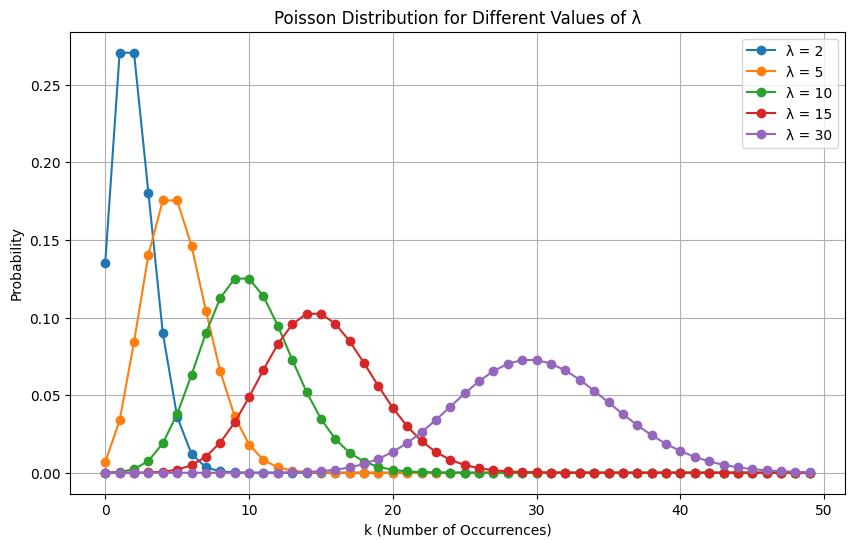

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define a range of k values
k_values = [2, 5, 10, 15, 30]  # Adjust as needed
x = np.arange(0, 50)  # Range of values to display

plt.figure(figsize=(10, 6))

# Loop through different values of k and plot the Poisson distribution
for k in k_values:
    pmf = poisson.pmf(x, k)
    plt.plot(x, pmf, marker='o', linestyle='-', label=f'λ = {k}')

plt.xlabel('k (Number of Occurrences)')
plt.ylabel('Probability')
plt.title('Poisson Distribution for Different Values of λ')
plt.legend()
plt.grid(True)
plt.show()


# Ito's Lemma for Jump Processes: A Summary

In this example, we study a jump process defined by

$$
dX_t = \mu\, dt + J\, dN_t,
$$

where:
- \( \mu \) is the drift (deterministic) term,
- \( J \) is a constant jump size,
- \( dN_t \) is the increment of a Poisson process (i.e. a jump indicator assuming values 0 or 1) with intensity \( \lambda \) (so that the probability of a jump during a short interval \( dt \) is approximately \( \lambda\, dt \)).

We are interested in how a function of the process, say

$$
g(t,X(t)) = X(t)^2,
$$

evolves over time.

---

## Step 1. Compute the Necessary Derivatives

Since

$$
g(t, X(t)) = X(t)^2,
$$

and there is no explicit \( t \)-dependence, we have:

1. **Time derivative:**

   $$
   \frac{\partial g}{\partial t} = 0.
   $$

2. **First derivative with respect to \( x \):**

   $$
   \frac{\partial g}{\partial x} = 2X.
   $$

3. **Second derivative with respect to \( x \):**

   $$
   \frac{\partial^2 g}{\partial x^2} = 2.
   $$

---

## Step 2. Ito's Lemma for Jump Processes

For a function \( g(t, X_t) \) where \( X_t \) has jumps, Ito's lemma is extended as follows:

$$
\begin{aligned}
dg(t, X_t) =\; 
& \frac{\partial g}{\partial t}(t, X_{t^-})\,dt 
+ \frac{\partial g}{\partial x}(t, X_{t^-})\,dX_t \\
&+ \frac{1}{2}\frac{\partial^2 g}{\partial x^2}(t, X_{t^-})\,d[X,X]_t^{c} \\
&+ \Biggl\{ g(t, X_{t^-}+J) - g(t, X_{t^-}) - J\,\frac{\partial g}{\partial x}(t, X_{t^-}) \Biggr\}\, dN_t.
\end{aligned}
$$

**Note:** In our example there is no continuous Brownian motion; hence the continuous quadratic variation term \( d[X,X]_t^{c} \) is zero.

---

## Step 3. Application to \( g(t, X(t)) = X(t)^2 \)

Substitute the definitions and derivatives into the Ito formula:

1. **The Increment \( dX_t \):**

   Given

   $$
   dX_t = \mu\,dt + J\,dN_t,
   $$

   multiplying by the first derivative yields the *linear* contribution:

   $$
   \frac{\partial g}{\partial x}(t, X_{t^-})\,dX_t = 2X_{t^-}\,(\mu\,dt + J\,dN_t)
   = 2X_{t^-}\mu\,dt + 2X_{t^-}J\,dN_t.
   $$

2. **The Jump Correction Term:**

   The correction captures the nonlinear effect at a jump. Compute:

   $$
   \begin{aligned}
   g(t, X_{t^-}+J) - g(t, X_{t^-}) - J\,\frac{\partial g}{\partial x}(t, X_{t^-})
   &= (X_{t^-}+J)^2 - X_{t^-}^2 - 2JX_{t^-} \\
   &= \bigl(X_{t^-}^2 + 2JX_{t^-} + J^2\bigr) - X_{t^-}^2 - 2JX_{t^-} \\
   &= J^2.
   \end{aligned}
   $$

   Multiplying by \( dN_t \) gives the jump contribution:

   $$
   \text{Jump correction} = J^2\, dN_t.
   $$

3. **Final Expression:**

   Combining the drift and the jump terms, Ito's lemma for \( g(t,X(t)) = X(t)^2 \) yields

   $$
   d\bigl(X_t^2\bigr) = 2X_{t^-}\mu\,dt + \Bigl(2X_{t^-}J + J^2\Bigr)dN_t.
   $$

This formula indicates that:
- The continuous (drift) effect contributes \( 2X_{t^-}\mu\, dt \).
- Each jump in the process contributes an increment of \(2X_{t^-}J + J^2\).

---

## Step 4. Simulation in Python

In our simulation, we use an Euler discretization as follows:

- **Process Update:**

  $$
  X(t+dt) = X(t) + \mu\, dt + J\, dN_t,
  $$

  where \( dN_t \) is modeled as a Bernoulli random variable with 
  
  $$  \Pr(dN_t = 1) \approx \lambda dt $$

- **Function Update using Ito's Lemma:**

  $$
  g(t+dt, X(t+dt)) = g(t, X(t)) + 2X_{t^-}\mu\,dt + \Bigl(2X_{t^-}J + J^2\Bigr)dN_t.
  $$

This complete summary connects the theoretical derivation of Ito's lemma for jump processes to the numerical simulation.

---

*Feel free to extend or modify this summary for further exploration of jump-diffusion models in your notebook!*


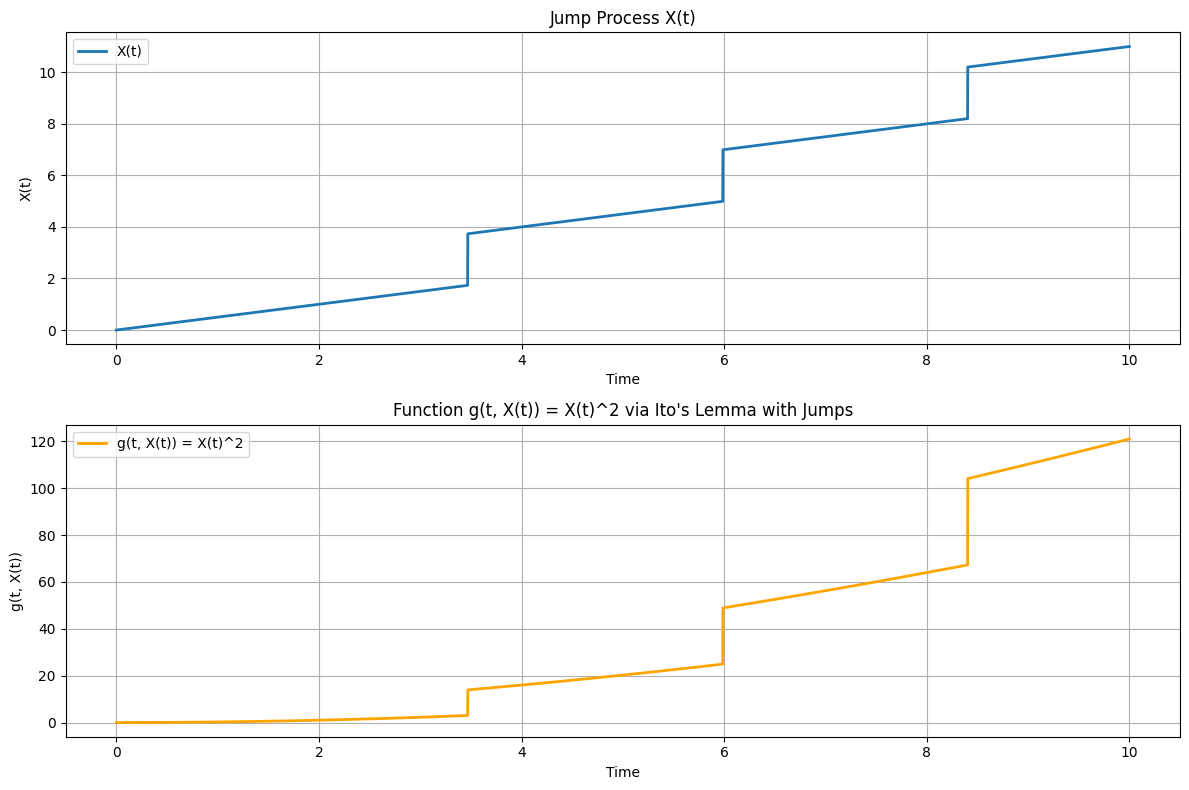

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the process:
T = 10.0             # Total time of simulation
dt = 0.001           # Time step
n_steps = int(T / dt)
time = np.linspace(0, T, n_steps + 1)

# Process parameters
mu = 0.5             # Drift term
J = 2.0              # Jump size (constant jump)
jump_rate = 0.5      # Intensity of jumps (on average, jump_rate jumps per unit time)

# Initialize arrays
X = np.zeros(n_steps + 1)  # Process value X(t), starting at X(0)=0 (or choose another initial condition)
g = np.zeros(n_steps + 1)  # Function value g(t, X(t)) = X(t)^2
g[0] = X[0]**2

# Simulation loop
for i in range(n_steps):
    # Simulate whether a jump occurs in this dt. dN_t = 1 if jump occurs, else 0.
    dN = 1 if np.random.rand() < jump_rate * dt else 0

    # Update the process X(t)
    # dX = mu*dt + J*dN (here dN is either 0 or 1)
    dx = mu * dt + J * dN
    X[i + 1] = X[i] + dx

    # Now apply the Ito formula for g = X^2.
    # The differential derived is: d(X^2) = 2 * X[i] * mu * dt + (2 * X[i] * J + J**2) * dN.
    dg = 2 * X[i] * mu * dt + (2 * X[i] * J + J**2) * dN
    g[i + 1] = g[i] + dg

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time, X, lw=2, label="X(t)")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Jump Process X(t)")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, g, lw=2, color='orange', label="g(t, X(t)) = X(t)^2")
plt.xlabel("Time")
plt.ylabel("g(t, X(t))")
plt.title("Function g(t, X(t)) = X(t)^2 via Ito's Lemma with Jumps")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Different methods of generating Poisson process

Mean of the Poisson process is: 14.320000000000142 with the expected value of 15


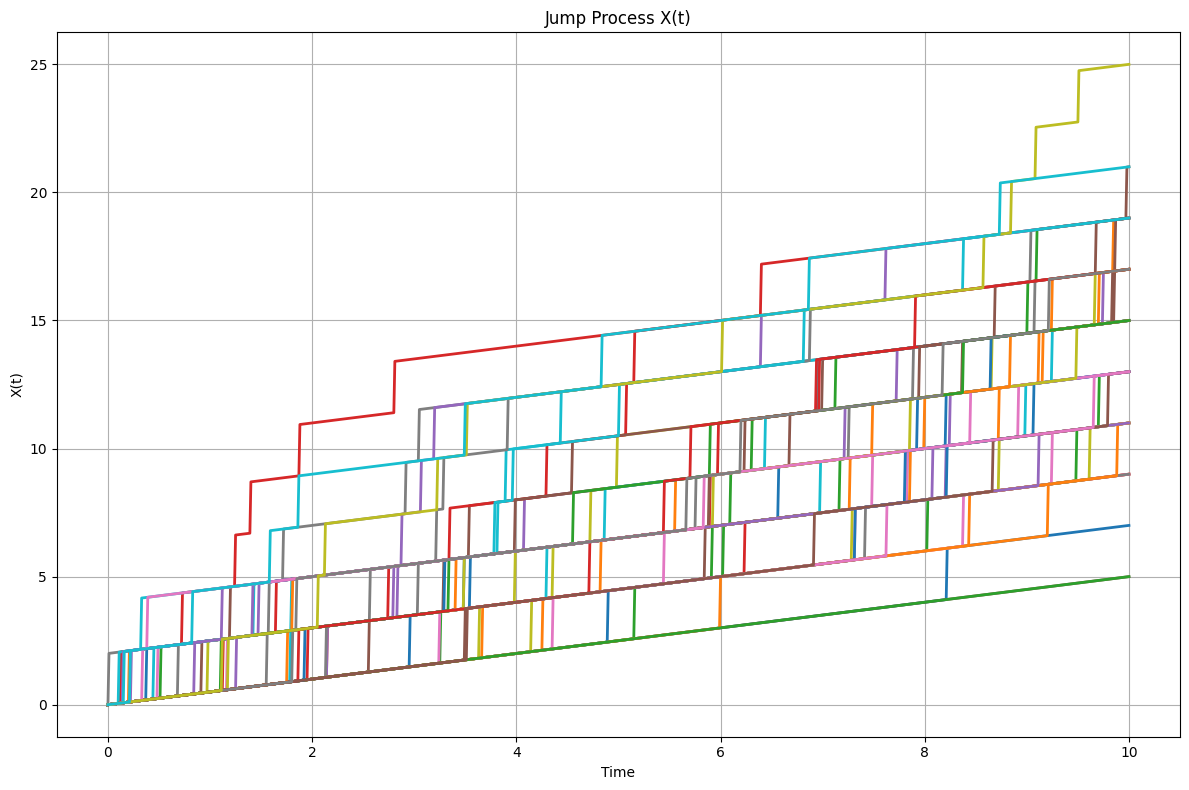

In [53]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Parameters of the process:
T = 10.0             # Total time of simulation
n_paths = 50
n_steps = 1000
dt = T/n_steps
time = np.linspace(0, T, n_steps + 1)

# Process parameters
mu = 0.5             # Drift term
J = 2.0              # Jump size (constant jump)
jump_rate = 0.5      # Intensity of jumps (on average, jump_rate jumps per unit time)

# Initialize arrays
X = np.zeros([n_paths, n_steps + 1])  # Process value X(t), starting at X(0)=0 (or choose another initial condition)
dN = np.random.rand(n_paths, n_steps + 1) # Randomly determine if a jump occurs

# Simulation loop
for i in range(n_steps):
    # Simulate whether a jump occurs in this dt. dN_t = 1 if jump occurs, else 0.
    dN[:,i] = np.where(dN[:,i] < jump_rate * dt, 1, 0)
    
    # Update the process X(t)
    # dX = mu*dt + J*dN (here dN is either 0 or 1)
    dx = mu * dt + J * dN[:,i]
    X[:,i + 1] = X[:,i] + dx

print("Mean of the Poisson process is: " + str(np.mean(X[:,1000])) + " with the expected value of 15")

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(time, np.transpose(X), lw=2, label="X(t)")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Jump Process X(t)")
plt.grid(True)

plt.tight_layout()
plt.show()


Mean of the Poisson process is: 15.240000000000144 with the expected value of 15


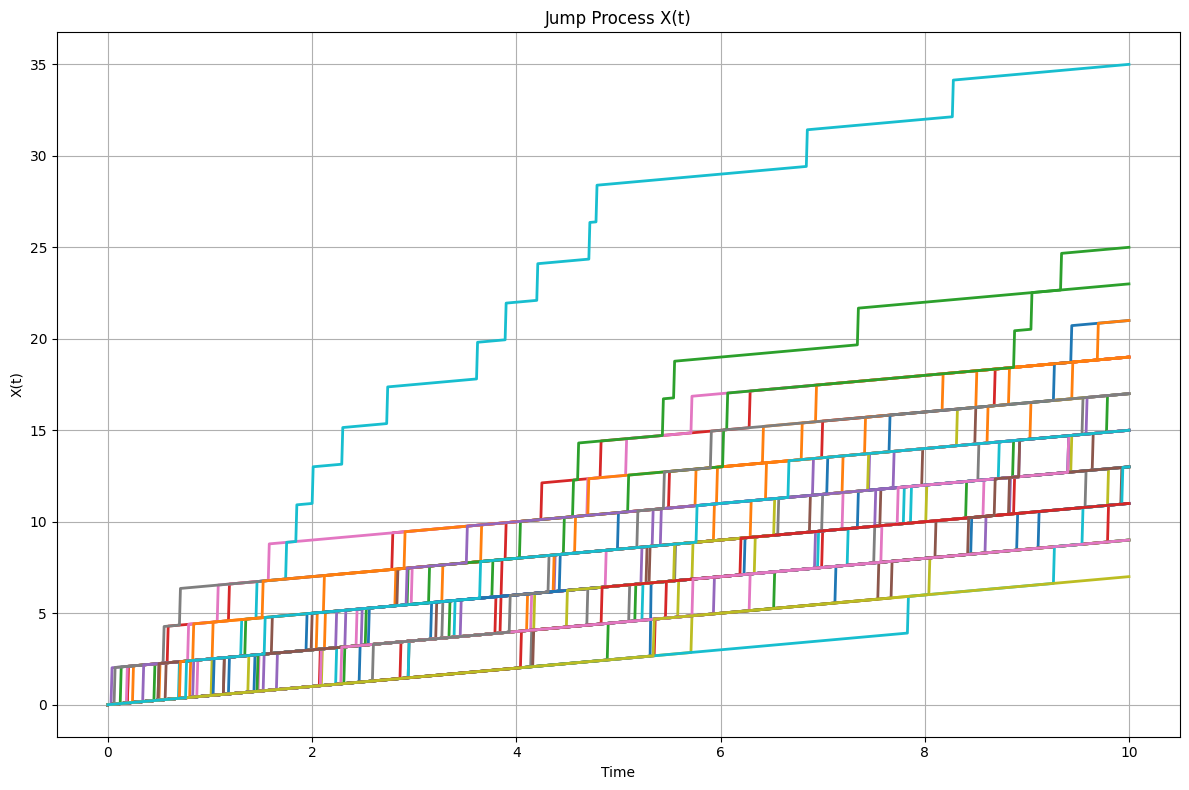

In [55]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Parameters of the process:
T = 10.0             # Total time of simulation
n_paths = 50
n_steps = 1000
dt = T/n_steps
time = np.linspace(0, T, n_steps + 1)

# Process parameters
mu = 0.5             # Drift term
J = 2.0              # Jump size (constant jump)
jump_rate = 0.5      # Intensity of jumps (on average, jump_rate jumps per unit time)

# Initialize arrays
X = np.zeros([n_paths, n_steps + 1])  # Process value X(t), starting at X(0)=0 (or choose another initial condition)

Z = np.random.poisson(jump_rate*dt,[n_paths, n_steps + 1])  # Poisson random variable for jumps

# Simulation loop
for i in range(n_steps):
    # Update the process X(t)
    X[:,i+1]  = X[:,i] + mu * dt + J * Z[:,i]

print("Mean of the Poisson process is: " + str(np.mean(X[:,1000])) + " with the expected value of 15")

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(time, np.transpose(X), lw=2, label="X(t)")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Jump Process X(t)")
plt.grid(True)

plt.tight_layout()
plt.show()
